## 기본 라이브러리 임포트 💫
---

In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import font_manager, rc

font_path = 'C:/Windows/Fonts/Malgun.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font)

#### DATASET 넣기 💫
---

In [345]:
# # df = pd.read_csv('./Data/Data.csv',encoding='utf-8')
# 직영= pd.read_csv('./Data/직영.csv',encoding='cp949', index_col = 0)
# 위탁 = pd.read_csv('./Data/위탁.csv',encoding='cp949', index_col = 0)
# df = pd.concat([직영, 위탁])

In [251]:
dataset = pd.read_csv('Data/#Final_Check.csv',encoding='cp949',index_col=0)

In [252]:
dataset.drop('접수일',axis=1,inplace=True)

In [253]:
dataset = dataset.fillna(0)

dataset.drop('위탁',axis=1,inplace=True)

In [254]:
dataset['직영'] = pd.Categorical(dataset['직영'])

In [256]:
dataset = dataset[dataset['직영']==1]

In [257]:
dataset = dataset[['품종','체중','색상','성별','중성화여부','당시의나이','상태']]

In [258]:
dataset

,품종,체중,색상,성별,중성화여부,당시의나이,상태
0,7,3.10,1,0,0,3,1
1,3,7.95,2,0,0,3,1
2,4,2.75,4,1,0,2,1
3,4,4.00,3,0,1,1,1
4,7,3.00,3,1,1,5,1
...,...,...,...,...,...,...,...
54250,3,4.20,1,0,0,3,1
54251,9,2.00,3,1,1,1,1
54252,8,20.00,2,1,0,5,1
54253,8,28.50,2,0,0,4,1


In [259]:
dataset = dataset[dataset['중성화여부']!=1]

In [260]:
nomix = dataset[dataset['품종']!=3]

In [261]:
nomix

,품종,체중,색상,성별,중성화여부,당시의나이,상태
0,7,3.10,1,0,0,3,1
2,4,2.75,4,1,0,2,1
12,4,2.00,1,0,0,2,1
22,0,23.00,1,0,0,2,0
23,7,2.80,1,0,2,2,1
...,...,...,...,...,...,...,...
54243,5,35.00,3,0,0,3,1
54246,5,25.00,2,0,0,4,0
54249,9,4.50,1,0,0,4,1
54252,8,20.00,2,1,0,5,1


### 체중 이상치 제거 및 정규화

In [262]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

In [91]:
# 함수 사용해서 이상치 값 삭제
# outlier_idx = get_outlier(df=dataset, column='체중', weight=1.5)
# dataset.drop(outlier_idx, axis=0, inplace=True)
# outlier_idx = get_outlier(df=dataset, column='당시의나이', weight=1.5)
# dataset.drop(outlier_idx, axis=0, inplace=True)

In [263]:
outlier_idx = get_outlier(df=nomix, column='체중', weight=1.5)
nomix.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=nomix, column='당시의나이', weight=1.5)
nomix.drop(outlier_idx, axis=0, inplace=True)

In [264]:
nomix['상태'].value_counts()

1    5431
0    2060
Name: 상태, dtype: int64

In [265]:
nomix['체중'] = np.log1p(nomix['체중'])
nomix['당시의나이'] = np.log1p(nomix['당시의나이'])

In [266]:
nomix['당시의나이'].value_counts()

1.098612    1633
1.386294    1433
0.000000    1405
0.693147    1309
1.609438     602
1.791759     563
2.079442     210
1.945910     201
2.197225     135
Name: 당시의나이, dtype: int64

In [ ]:
x_trans, optimal_lambda = stats.boxcox(dataset['당시의나이'])
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

prob = stats.probplot(x_trans, dist = stats.norm, plot = ax2)
plt.show()

<AxesSubplot:xlabel='체중', ylabel='Density'>

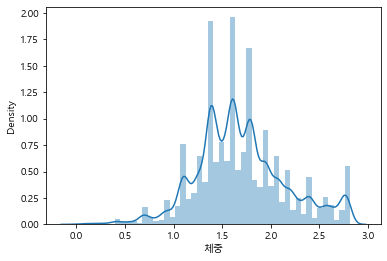

In [219]:
sns.distplot(nomix['체중'])

In [267]:
nomix['품종'] = nomix['품종'].astype('category')
nomix['색상'] = nomix['색상'].astype('category')
nomix['성별'] = nomix['성별'].astype('category')
nomix['중성화여부'] = nomix['중성화여부'].astype('category')
nomix['상태'] = nomix['상태'].astype('category')

In [268]:
nomix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7491 entries, 0 to 54252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   품종      7491 non-null   category
 1   체중      7491 non-null   float64 
 2   색상      7491 non-null   category
 3   성별      7491 non-null   category
 4   중성화여부   7491 non-null   category
 5   당시의나이   7491 non-null   float64 
 6   상태      7491 non-null   category
dtypes: category(5), float64(2)
memory usage: 213.1 KB


In [48]:
# def divide_age(x):
#     if x < 1:
#         return 1
#     elif x <= 3:
#         return 2
#     elif x <=10:
#         return 3
#     else:
#         return 4

In [49]:
# dataset['당시의나이'] = dataset['당시의나이'].apply(divide_age)

In [ ]:
# import scipy.stats as ss 

# data_ss=ss.zscore(data)
# print(data_ss)

### boxcox

In [34]:
from scipy import stats

In [16]:
dataset['당시의나이']

0         3
1         3
2         2
3         1
4         5
         ..
337421    3
337422    2
337423    0
337424    3
337425    0
Name: 당시의나이, Length: 337426, dtype: int64

In [18]:
dataset['당시의나이'] = dataset['당시의나이']+1

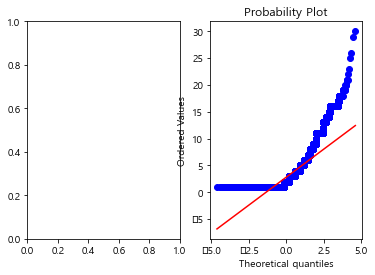

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
prob = stats.probplot(dataset['당시의나이'], dist = stats.norm, plot = ax2)
plt.show()

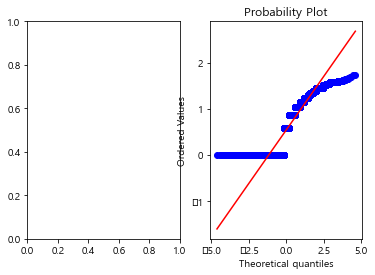

In [21]:
x_trans, optimal_lambda = stats.boxcox(dataset['당시의나이'])
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

prob = stats.probplot(x_trans, dist = stats.norm, plot = ax2)
plt.show()

### mean_encoding

In [153]:
target = '상태'
sex_mean = dataset.groupby('품종')[target].mean()
sex_mean

품종
0    0.480385
1    0.836748
2    0.706363
3    0.321097
4    0.637855
5    0.683084
6    0.586583
7    0.624514
8    0.623217
9    0.421328
Name: 상태, dtype: float64

In [154]:
dataset['품종_mean'] = dataset['품종'].map(sex_mean)
dataset[['품종', '품종_mean']].head()

,품종,품종_mean
0,7,0.624514
1,3,0.321097
2,4,0.637855
3,4,0.637855
4,7,0.624514


In [64]:
dataset['품종'] = dataset['품종'].astype('category')
dataset['색상'] = dataset['색상'].astype('category')
dataset['성별'] = dataset['성별'].astype('category')
dataset['중성화여부'] = dataset['중성화여부'].astype('category')
dataset['당시의나이'] = dataset['당시의나이'].astype('category')
dataset['상태'] = dataset['상태'].astype('category')

In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215386 entries, 0 to 337425
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   품종      215386 non-null  category
 1   체중      215386 non-null  float64 
 2   색상      215386 non-null  category
 3   성별      215386 non-null  category
 4   중성화여부   215386 non-null  category
 5   당시의나이   215386 non-null  category
 6   상태      215386 non-null  category
dtypes: category(6), float64(1)
memory usage: 12.6 MB


In [156]:
dataset.drop('품종', axis = 1, inplace = True)

In [157]:
df = dataset

In [158]:
df['상태'].value_counts()

0    201345
1    136081
Name: 상태, dtype: int64

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337426 entries, 0 to 337425
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   체중       337426 non-null  float64 
 1   색상       337426 non-null  category
 2   성별       337426 non-null  category
 3   중성화여부    337426 non-null  category
 4   당시의나이    337426 non-null  int64   
 5   직영       337426 non-null  category
 6   상태       337426 non-null  category
 7   품종_mean  337426 non-null  category
dtypes: category(6), float64(1), int64(1)
memory usage: 9.7 MB


In [160]:
df.isna().sum()

체중         0
색상         0
성별         0
중성화여부      0
당시의나이      0
직영         0
상태         0
품종_mean    0
dtype: int64

In [167]:
mix

,품종,체중,색상,성별,중성화여부,당시의나이,상태
1,3,2.191654,2,0,0,3,1
8,3,0.788457,1,1,0,1,1
9,3,1.856298,5,0,2,1,1
10,3,1.902108,5,1,0,9,1
13,3,1.386294,1,0,0,3,1
...,...,...,...,...,...,...,...
337297,3,1.791759,3,1,0,1,1
337298,3,1.945910,3,0,0,1,1
337304,3,1.945910,3,0,0,2,1
337420,3,1.629241,1,0,2,1,1


In [168]:
mix['품종'] = mix['품종'].astype('category')
mix['색상'] = mix['색상'].astype('category')
mix['성별'] = mix['성별'].astype('category')
mix['중성화여부'] = mix['중성화여부'].astype('category')
mix['상태'] = mix['상태'].astype('category')

In [247]:
df_2020.drop('접수일',axis = 1, inplace = True)

In [250]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18760 entries, 222604 to 337357
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   품종      18760 non-null  category
 1   색상      18760 non-null  category
 2   성별      18760 non-null  category
 3   체중      18760 non-null  float64 
 4   중성화여부   18760 non-null  category
 5   당시의나이   18760 non-null  int64   
 6   상태      18760 non-null  category
dtypes: category(5), float64(1), int64(1)
memory usage: 532.2 KB


In [326]:
df_mix = df[df['품종'] == 3]
df_no_mix = df[df['품종'] != 3]

In [329]:
df_no_mix.shape[0]

17151

In [330]:
df_mix.shape[0]

37107

In [337]:
select_count = int((df_no_mix.shape[0]/(df_mix.shape[0] + df_no_mix.shape[0])) * df_mix.shape[0])

In [303]:
import random
random_mix_index = random.sample(list(df_mix.index),select_count)

In [306]:
len(random_mix_index)

9088

In [305]:
for i in range(len(list(df_2020_no_mix.index))) : 
    random_mix_index.append(list(df_2020_no_mix.index)[i])

In [308]:
df_down = df.loc[random_mix_index, :]

In [278]:
df_2020_mix.shape

(14672, 7)

In [279]:
df_2020_no_mix.shape

(4088, 7)

#### 타입 category로 바꾸자 💫
---

In [323]:
df['품종'] = df['품종'].astype('category')
df['색상'] = df['색상'].astype('category')
df['성별'] = df['성별'].astype('category')
df['중성화여부'] = df['중성화여부'].astype('category')
# df['보호소형태'] = df['보호소형태'].astype('category')
df['상태'] = df['상태'].astype('category')

In [324]:
df['상태'].value_counts()

1    27602
0    26656
Name: 상태, dtype: int64

In [325]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54258 entries, 3 to 337357
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   품종      54258 non-null  category
 1   색상      54258 non-null  category
 2   성별      54258 non-null  category
 3   체중      54258 non-null  float64 
 4   중성화여부   54258 non-null  category
 5   당시의나이   54258 non-null  int64   
 6   상태      54258 non-null  category
 7   접수일     54258 non-null  int64   
dtypes: category(5), float64(1), int64(2)
memory usage: 1.9 MB


### train, test 나누기

In [54]:
dataset

,품종,체중,색상,성별,중성화여부,당시의나이,상태
0,7,1.410987,1,0,0,2,1
1,3,2.191654,2,0,0,2,1
2,4,1.321756,4,1,0,2,1
8,3,0.788457,1,1,0,2,1
9,3,1.856298,5,0,2,2,1
...,...,...,...,...,...,...,...
337420,3,1.629241,1,0,2,2,1
337421,3,1.504077,1,0,2,2,1
337423,9,1.556037,5,1,0,1,0
337424,9,2.197225,4,1,0,2,0


In [269]:
from sklearn.model_selection import train_test_split

X_data = nomix[['품종', '색상', '성별', '체중', '중성화여부', '당시의나이']]

y_label = nomix['상태']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.20, random_state = 0, stratify=y_label)

In [223]:
y_train.value_counts()

1    27828
0    15284
Name: 상태, dtype: int64

In [118]:
y_test.value_counts()

0    40269
1    27217
Name: 상태, dtype: int64

In [119]:
X_train.isna().sum()

품종_mean    0
색상         0
성별         0
체중         0
중성화여부      0
당시의나이      0
dtype: int64

In [120]:
y_train.isna().sum()

0

In [271]:
from sklearn.model_selection import train_test_split

X_data = df_2020_no_mix[['색상', '성별', '체중', '중성화여부', '당시의나이']]

y_label = df_2020_no_mix['상태']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size = 0.20, random_state = 0, stratify=y_label)

In [270]:
from imblearn.over_sampling import SMOTENC

smotenc = SMOTENC([0, 1, 2, 4],random_state = 101)
X_train_over, y_train_over = smotenc.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 전 레이블 값 분포 : \n', pd.Series(y_train).value_counts())
print('SMOTE 적용 후 레이블 값 분포 : \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (5992, 6) (5992,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :  (8688, 6) (8688,)
SMOTE 적용 전 레이블 값 분포 : 
 1    4344
0    1648
Name: 상태, dtype: int64
SMOTE 적용 후 레이블 값 분포 : 
 0    4344
1    4344
Name: 상태, dtype: int64


## LightGBM
---
    lightgbm 은 
    !pip install lightgbm 해줘야해

In [22]:
!pip install lightgbm

In [60]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance, plot_metric, plot_tree
from sklearn.model_selection import train_test_split, cross_validate

lgbm_wrapper_classifier = LGBMClassifier(n_estimators = 200)
evals = [(X_test, y_test)]
lgbm_wrapper_classifier.fit(X_train, y_train, early_stopping_rounds = 30, 
                            eval_metric = 'logloss', eval_set = evals, verbose = True)

preds = lgbm_wrapper_classifier.predict(X_test)
pred_proba = lgbm_wrapper_classifier.predict_proba(X_test)[:,1]

[1]	valid_0's binary_logloss: 0.66808
Training until validation scores don't improve for 30 rounds
[2]	valid_0's binary_logloss: 0.65944
[3]	valid_0's binary_logloss: 0.652402
[4]	valid_0's binary_logloss: 0.646647
[5]	valid_0's binary_logloss: 0.641913
[6]	valid_0's binary_logloss: 0.638021
[7]	valid_0's binary_logloss: 0.634824
[8]	valid_0's binary_logloss: 0.632134
[9]	valid_0's binary_logloss: 0.629898
[10]	valid_0's binary_logloss: 0.62801
[11]	valid_0's binary_logloss: 0.626425
[12]	valid_0's binary_logloss: 0.625113
[13]	valid_0's binary_logloss: 0.623956
[14]	valid_0's binary_logloss: 0.623045
[15]	valid_0's binary_logloss: 0.622228
[16]	valid_0's binary_logloss: 0.621571
[17]	valid_0's binary_logloss: 0.620994
[18]	valid_0's binary_logloss: 0.62054
[19]	valid_0's binary_logloss: 0.62008
[20]	valid_0's binary_logloss: 0.619712
[21]	valid_0's binary_logloss: 0.619406
[22]	valid_0's binary_logloss: 0.619108
[23]	valid_0's binary_logloss: 0.618869
[24]	valid_0's binary_logloss: 0.

In [158]:
cross_val = cross_validate(estimator = lgbm_wrapper_classifier, X = X_data, y = y_label, cv = 3)
print(cross_val['test_score'])
print('avg test score : {:.4f} (+/-{:.4f})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

[0.60239965 0.63419219 0.61417671]
avg test score : 0.6169 (+/-0.0131)


In [159]:
cross_val

{'fit_time': array([0.19996119, 0.19953752, 0.17897272]),
 'score_time': array([0.04129744, 0.04349613, 0.04486322]),
 'test_score': array([0.60239965, 0.63419219, 0.61417671])}

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

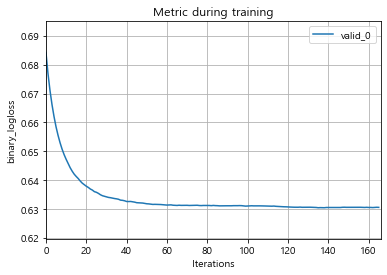

In [160]:
plot_metric(lgbm_wrapper_classifier)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

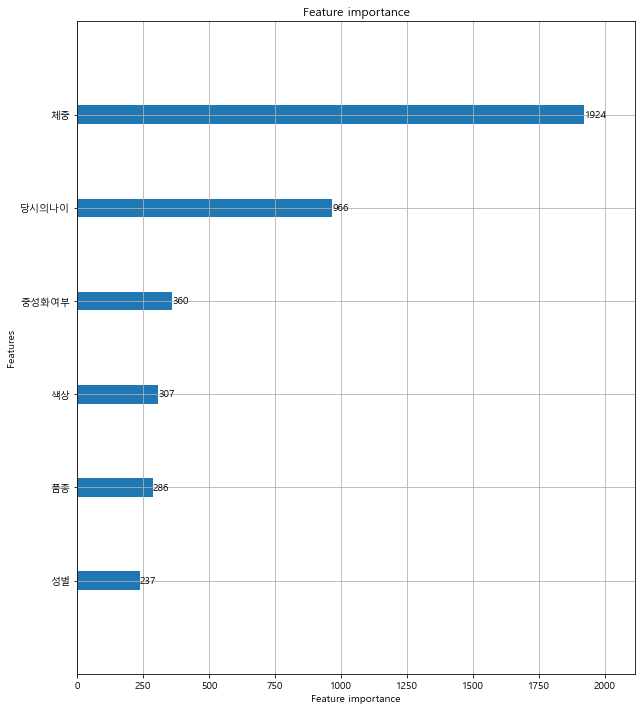

In [161]:
from lightgbm import plot_importance
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm_wrapper_classifier, ax = ax)

### Stacking 💫
    Model 들을 쌓아서, 정확도를 올리자
   ----

In [271]:
# Model import 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score

In [272]:
# Model import 

knn_clf = KNeighborsClassifier(n_neighbors = 9)

rf_clf = RandomForestClassifier(bootstrap = True,
 max_depth = 90,
 max_features = 2,
 min_samples_leaf = 5,
 min_samples_split = 12,
 n_estimators = 1000)

dt_clf = DecisionTreeClassifier()

ada_clf = AdaBoostClassifier(n_estimators = 100) 

mlp_clf = MLPClassifier(solver='lbfgs', random_state = 10,
                      hidden_layer_sizes=[100,100]) # hideen_layer_sizes Tunnig 

grd_clf = GradientBoostingClassifier()

gb_clf = GaussianNB() # Tunning 어려움

ex_clf = ExtraTreeClassifier() # Tunning 딱히 불필요 

lgbm_wrapper_classifier = LGBMClassifier(n_estimators = 200)

lr_final = LogisticRegression(C = 0.5)

In [243]:
# Model Training 

# knn_clf.fit(X_train, y_train) 
# rf_clf.fit(X_train, y_train) 
# dt_clf.fit(X_train, y_train)
# ada_clf.fit(X_train, y_train) 

AdaBoostClassifier(n_estimators=100)

In [273]:
# # mlp_clf.fit(X_train,y_train)
# grd_clf.fit(X_train,y_train)
# gb_clf.fit(X_train,y_train)
# ex_clf.fit(X_train,y_train)

knn_clf.fit(X_train_over, y_train_over) 
rf_clf.fit(X_train_over, y_train_over) 
dt_clf.fit(X_train_over, y_train_over) 
ada_clf.fit(X_train_over, y_train_over) 
# mlp_clf.fit(X_train_over,y_train_over)
grd_clf.fit(X_train_over,y_train_over)
gb_clf.fit(X_train_over,y_train_over)
ex_clf.fit(X_train_over,y_train_over)

evals = [(X_test, y_test)]
lgbm_wrapper_classifier.fit(X_train_over, y_train_over, early_stopping_rounds = 30, 
                            eval_metric = 'logloss', eval_set = evals, verbose = True)

[1]	valid_0's binary_logloss: 0.676861
Training until validation scores don't improve for 30 rounds
[2]	valid_0's binary_logloss: 0.663315
[3]	valid_0's binary_logloss: 0.652684
[4]	valid_0's binary_logloss: 0.643972
[5]	valid_0's binary_logloss: 0.637099
[6]	valid_0's binary_logloss: 0.630318
[7]	valid_0's binary_logloss: 0.625193
[8]	valid_0's binary_logloss: 0.620918
[9]	valid_0's binary_logloss: 0.61694
[10]	valid_0's binary_logloss: 0.613831
[11]	valid_0's binary_logloss: 0.611345
[12]	valid_0's binary_logloss: 0.609273
[13]	valid_0's binary_logloss: 0.607201
[14]	valid_0's binary_logloss: 0.605174
[15]	valid_0's binary_logloss: 0.60261
[16]	valid_0's binary_logloss: 0.601761
[17]	valid_0's binary_logloss: 0.60013
[18]	valid_0's binary_logloss: 0.598789
[19]	valid_0's binary_logloss: 0.597654
[20]	valid_0's binary_logloss: 0.59669
[21]	valid_0's binary_logloss: 0.595229
[22]	valid_0's binary_logloss: 0.594221
[23]	valid_0's binary_logloss: 0.593063
[24]	valid_0's binary_logloss: 0

LGBMClassifier(n_estimators=200)

In [274]:
# Model Prediction

knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
# mlp_pred = mlp_clf.predict(X_test)
grd_pred = grd_clf.predict(X_test)
gb_pred = gb_clf.predict(X_test)
ex_pred = ex_clf.predict(X_test)
lightgbm_pred = lgbm_wrapper_classifier.predict(X_test)




print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_pred)))
# print('MLPClassfier 정확도 : {0:.4f}'.format(accuracy_score(y_test, mlp_pred)))
print('GradientBoostingClassifer : {0:.4f}'.format(accuracy_score(y_test, grd_pred)))
print('GaussianNB 정확도 : {0:.4f}'.format(accuracy_score(y_test, gb_pred)))
print('ExtraTreeclassifer 정확도 : {0:.4f}'.format(accuracy_score(y_test, ex_pred)))
print('LightGBM 정확도 : {0:.4f}'.format(accuracy_score(y_test, lightgbm_pred)))


KNN 정확도 : 0.6604
랜덤 포레스트 정확도 : 0.7011
결정 트리 정확도 : 0.6751
에이다부스트 정확도 : 0.7265
GradientBoostingClassifer : 0.7332
GaussianNB 정확도 : 0.6338
ExtraTreeclassifer 정확도 : 0.6664
LightGBM 정확도 : 0.7158


In [275]:
### df_mix
pred = np.array([rf_pred, ada_pred, grd_pred, lightgbm_pred])
pred = np.transpose(pred)

In [249]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 : 0.6882


In [276]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

print(accuracy_score(y_test, lightgbm_pred))
print(recall_score(y_test, lightgbm_pred))
print(precision_score(y_test, lightgbm_pred))
print(f1_score(y_test, lightgbm_pred))

0.7158105403602402
0.797608095676173
0.8080149114631874
0.8027777777777778


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(lr_final, X_train, y_train, cv = 3)
cf = confusion_matrix(y_train, y_train_pred)
print(cf)

In [ ]:
오버샘플링 : 0.78
오버샘플링X : 0.79
직영 오버샘플링 : 0.80
직영 오토인코더0.83

In [321]:
nomix['당시의나이'].value_counts()

1.098612    1633
1.386294    1433
0.000000    1405
0.693147    1309
1.609438     602
1.791759     563
2.079442     210
1.945910     201
2.197225     135
Name: 당시의나이, dtype: int64

## autoencoder
---

In [277]:
from pycaret.classification import *

In [307]:
clf = setup(data = nomix, target = '상태', train_size = 0.8, session_id = 10, use_gpu = True)

,Description,Value
0,session_id,10
1,Target,상태
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(7491, 7)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,4
8,Ordinal Features,False
9,High Cardinality Features,False


In [308]:
best3models = compare_models(sort = 'F1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7528,0.7155,0.9130,0.7818,0.8423,0.2866,0.3060,0.1990
catboost,CatBoost Classifier,0.7518,0.7190,0.9162,0.7794,0.8422,0.2782,0.2997,4.2650
gbc,Gradient Boosting Classifier,0.7430,0.7102,0.9220,0.7687,0.8383,0.2358,0.2614,0.5030
ada,Ada Boost Classifier,0.7356,0.6958,0.9282,0.7595,0.8354,0.1967,0.2251,0.2570
ridge,Ridge Classifier,0.7273,0.0000,0.9028,0.7633,0.8272,0.2019,0.2191,0.0200
lr,Logistic Regression,0.7253,0.6863,0.9063,0.7600,0.8267,0.1886,0.2069,0.0740
knn,K Neighbors Classifier,0.7316,0.6635,0.8721,0.7819,0.8245,0.2618,0.2692,0.6940
lda,Linear Discriminant Analysis,0.7308,0.6867,0.8594,0.7877,0.8219,0.2748,0.2794,0.0410
svm,SVM - Linear Kernel,0.7258,0.0000,0.8700,0.7797,0.8207,0.2348,0.2449,0.0610
rf,Random Forest Classifier,0.7273,0.6827,0.8520,0.7880,0.8186,0.2719,0.2760,1.1340


In [320]:
lightgbm = create_model('catboost', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7472,0.7187,0.9141,0.7760,0.8394,0.2642,0.2849
1,0.7461,0.7055,0.9190,0.7729,0.8396,0.2521,0.2755
2,0.7456,0.7128,0.9071,0.7778,0.8375,0.2678,0.2854
Mean,0.7463,0.7124,0.9134,0.7756,0.8388,0.2614,0.2819
SD,0.0007,0.0054,0.0049,0.0020,0.0010,0.0067,0.0046


In [310]:
tuned_light = tune_model(lightgbm, fold = 3, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7357,0.7082,0.9744,0.7413,0.8420,0.1179,0.1809
1,0.7381,0.6914,0.9681,0.7456,0.8424,0.1390,0.1973
2,0.7316,0.7008,0.9723,0.7388,0.8396,0.1031,0.1595
Mean,0.7351,0.7001,0.9716,0.7419,0.8414,0.1200,0.1792
SD,0.0027,0.0069,0.0026,0.0028,0.0012,0.0147,0.0154


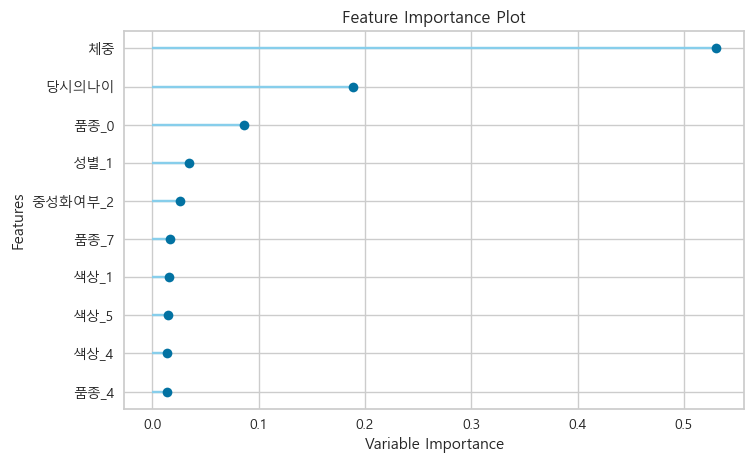

In [316]:
plot_model(lightgbm, plot = 'feature')

In [312]:
stacker = stack_models(estimator_list = best3models[1:], meta_model = best3models[0], fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7352,0.6983,0.8975,0.7728,0.8305,0.2410,0.2557
1,0.7441,0.7146,0.9176,0.7717,0.8383,0.2462,0.2690
2,0.7431,0.6904,0.9085,0.7748,0.8364,0.2563,0.2748
Mean,0.7408,0.7011,0.9079,0.7731,0.8351,0.2478,0.2665
SD,0.0040,0.0101,0.0082,0.0013,0.0033,0.0063,0.0080


In [317]:
final_model = finalize_model(stacker)
prediction = predict_model(final_model, data=dataset.iloc[-100:])

In [318]:
prediction

,품종,체중,색상,성별,중성화여부,당시의나이,상태,Label,Score
54135,4,6.27,4,0,2,0,1,1,0.8617
54137,3,1.00,5,1,0,0,0,1,0.8250
54138,3,1.00,5,0,0,0,0,0,0.5627
54139,3,1.00,5,0,0,0,1,0,0.5627
54140,3,4.00,5,1,0,0,0,1,0.8533
...,...,...,...,...,...,...,...,...,...
54246,5,25.00,2,0,0,4,0,1,0.6312
54249,9,4.50,1,0,0,4,1,0,0.6864
54250,3,4.20,1,0,0,3,1,0,0.6285
54252,8,20.00,2,1,0,5,1,0,0.5786


In [319]:
from pycaret.utils import check_metric
check_metric(prediction['Purchase'], prediction['Label'], metric = 'Accuracy')

KeyError: 'Purchase'